In [104]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl
import matplotlib.pyplot as plt

# import linkage
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_mutual_info_score as AMI

from sklearn.metrics import adjusted_rand_score
from itertools import combinations

import pickle

In [105]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [106]:
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [107]:
model = StepMix(n_components=13, measurement="binary", verbose=0, random_state=123)


In [108]:
sympdf_train, sympdf_test = train_test_split(sympdf, test_size=0.2, random_state=123)

In [109]:
model.fit(sympdf_train)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it, max_LL=-3.26e+5, max_avg_LL=-67.5]


StepMix(measurement='binary', n_components=13, random_state=123)

In [110]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

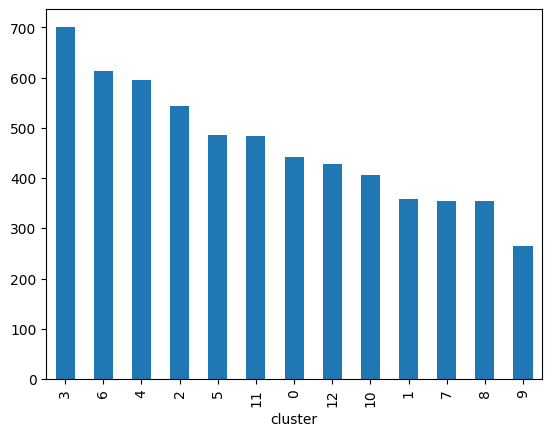

In [111]:
df['cluster'].value_counts().plot(kind='bar')
# slight variation with the full dataset

In [112]:
clust_full = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [114]:
# compare the two clusterings using rand index
AMI(df['cluster'], clust_full['cluster'])

0.5544607667945026

In [146]:
# divide sympdf into train and test multiple times and fit models for each one
models = []
for i in range(10):
    sympdf_train, sympdf_test = train_test_split(sympdf, test_size=0.2, random_state=i)
    model = StepMix(n_components=13, measurement="binary", verbose=0, random_state = 321)
    model.fit(sympdf_train)
    models.append(model)

models_traintest = models

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it, max_LL=-3.26e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.01s/it, max_LL=-3.25e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.53s/it, max_LL=-3.25e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.05s/it, max_LL=-3.26e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, max_LL=-3.25e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it, max_LL=-3.26e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.04s/it, max_LL=-3.25e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.84s/it, max_LL=-3.26e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it, max_LL=-3.25e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.20s/it, max_LL=-3.25e+5, max_avg_LL=-67.5]


In [148]:


# Initialize an empty list to store ARI and AMI values
scores_list = []

# Calculate ARI between all pairs of models
for i, j in combinations(range(10), 2):
    labels_i = models_traintest[i].predict(sympdf)
    labels_j = models_traintest[j].predict(sympdf)
    ari_score = adjusted_rand_score(labels_i, labels_j)
    ami_score = AMI(labels_i, labels_j)
    scores_list.append({"Model_1": i, "Model_2": j, "ARI": ari_score, "AMI" : ami_score})

# Create a DataFrame from the list of dictionaries
scores_df = pd.DataFrame(scores_list)

# Display the DataFrame
print(scores_df)


    Model_1  Model_2       ARI       AMI
0         0        1  0.421203  0.592085
1         0        2  0.430588  0.607853
2         0        3  0.428678  0.609791
3         0        4  0.440476  0.597741
4         0        5  0.431049  0.596100
5         0        6  0.411495  0.577097
6         0        7  0.339280  0.541834
7         0        8  0.407088  0.583600
8         0        9  0.641908  0.735789
9         1        2  0.508229  0.652121
10        1        3  0.505295  0.648911
11        1        4  0.428068  0.605274
12        1        5  0.618380  0.714670
13        1        6  0.443971  0.605899
14        1        7  0.478709  0.634475
15        1        8  0.474984  0.630669
16        1        9  0.417253  0.594737
17        2        3  0.502651  0.648827
18        2        4  0.349120  0.551861
19        2        5  0.407007  0.586166
20        2        6  0.459230  0.622457
21        2        7  0.413474  0.581324
22        2        8  0.389645  0.577961
23        2     

In [149]:
scores_df['ARI'].mean()


0.4523129767287813

In [150]:
scores_df['AMI'].mean()


0.6122779368745817

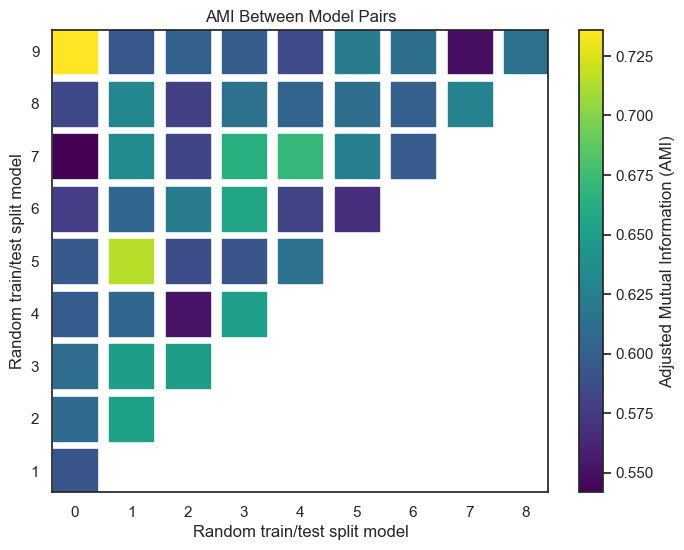

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(scores_df["Model_1"], scores_df["Model_2"], c=scores_df["AMI"], cmap="viridis", s=1000, marker = "s")
plt.colorbar(label="Adjusted Mutual Information (AMI)")
plt.xlabel("Random train/test split model")
plt.ylabel("Random train/test split model")
plt.title("AMI Between Model Pairs")
#plt.show()
plt.savefig("figs/AMI_model_pairs_traintestsplit.pdf")

In [152]:
def hamming_metric(x,y):
    return np.sum(x != y) / len(x)


# Calculate Silhouette score for each model
for i, model in enumerate(models_traintest):
    labels = model.predict(sympdf_test)
    silhouette_avg = silhouette_score(sympdf_test, labels, metric=hamming_metric)
    print(f"Silhouette score for model {i}: {silhouette_avg}")

Silhouette score for model 0: -0.056714338721168864
Silhouette score for model 1: -0.04982590158337373
Silhouette score for model 2: -0.05272966315356189
Silhouette score for model 3: -0.03890900215004198
Silhouette score for model 4: -0.05098019279618013
Silhouette score for model 5: -0.049523104137870574
Silhouette score for model 6: -0.04196367577821209
Silhouette score for model 7: -0.04639377010860682
Silhouette score for model 8: -0.05741124421267894
Silhouette score for model 9: -0.06311824883799615


In [153]:
models_seed = []
for i in range(10):
    model = StepMix(n_components=13, measurement="binary", verbose=0, random_state=i)
    model.fit(sympdf)
    models_seed.append(model)



Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.24s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.67s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.87s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.71s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.24s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.04s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.86s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.82s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]


In [154]:
# Initialize an empty list to store ARI values
ari_list = []
ami_list = [] 

# Calculate ARI between all pairs of models
for i, j in combinations(range(10), 2):
    labels_i = models_seed[i].predict(sympdf)
    labels_j = models_seed[j].predict(sympdf)
    ari_score = adjusted_rand_score(labels_i, labels_j)
    ami_score= AMI(labels_i,labels_j)
    ari_list.append({"Model_1": i, "Model_2": j, "ARI": ari_score})
    ami_list.append({"Model_1": i, "Model_2": j, "AMI": ami_score})

# Create a DataFrame from the list of dictionaries
ari_df = pd.DataFrame(ari_list)
ami_df = pd.DataFrame(ami_list)

# Display the DataFrame
print(ari_df)
print(ami_df)

    Model_1  Model_2       ARI
0         0        1  0.391337
1         0        2  0.508679
2         0        3  0.399885
3         0        4  0.465999
4         0        5  0.643392
5         0        6  0.525152
6         0        7  0.561175
7         0        8  0.407658
8         0        9  0.405444
9         1        2  0.467746
10        1        3  0.603766
11        1        4  0.587025
12        1        5  0.388266
13        1        6  0.386165
14        1        7  0.318931
15        1        8  0.481127
16        1        9  0.364046
17        2        3  0.512122
18        2        4  0.521824
19        2        5  0.474947
20        2        6  0.392428
21        2        7  0.375173
22        2        8  0.601702
23        2        9  0.409733
24        3        4  0.487881
25        3        5  0.470263
26        3        6  0.417512
27        3        7  0.332195
28        3        8  0.508659
29        3        9  0.428609
30        4        5  0.438949
31      

In [144]:
ami_df['AMI'].mean()

0.6265019750242671

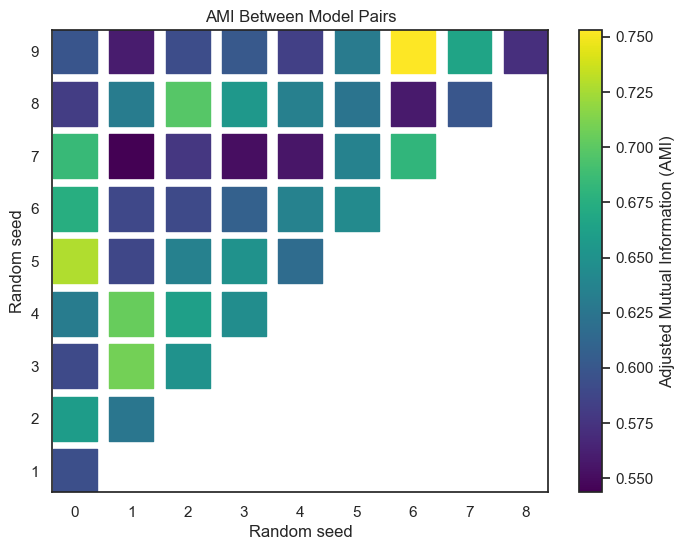

In [155]:

plt.figure(figsize=(8, 6))
plt.scatter(ami_df["Model_1"], ami_df["Model_2"], c=ami_df["AMI"], cmap="viridis", s=1000, marker = "s")
plt.colorbar(label="Adjusted Mutual Information (AMI)")
plt.xlabel("Random seed")
plt.ylabel("Random seed")
plt.title("AMI Between Model Pairs")
#plt.show()
plt.savefig("figs/AMI_model_pairs_randomseed.pdf")

In [29]:
clustdf = []
for model in models:
    clustdf.append(model.predict(sympdf))

In [34]:
clustdf = pd.DataFrame(clustdf).T

In [36]:
clustdf.index = df.index

In [41]:
def ensemble_to_co_association(ensemble, ignore_label=None):
    #if isinstance(ensemble, pd.DataFrame) and 'labels' in ensemble.columns:
    #    df = pd.DataFrame(ensemble.labels)
    #    df = pd.DataFrame(df['labels'].to_list()).transpose()
    #else:
    #    df = pd.DataFrame(ensemble).transpose()
    df = ensemble
    N = len(df)
    co_association_matrix = np.zeros([N, N])
    n_estimators = len(ensemble)
    for ri, row in df.iterrows():
        if ri % 500 == 0:
            print(ri)
        compare = df.loc[ri + 1:]
        #return(compare)
        if ignore_label is not None:
            shared_counts = ((row == compare) * (row != -1) * (compare != -1)).sum(axis=1)
        else:
            shared_counts = (row == compare).sum(axis=1)
        co_association_matrix[ri, ri + 1:] = shared_counts / n_estimators
    return co_association_matrix


In [44]:
coass = ensemble_to_co_association(pd.DataFrame(clustdf.values))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [47]:
symmetric_matrix = coass + coass.T

linkage_matrix = linkage(symmetric_matrix, method='average')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_4537/3434136630.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(symmetric_matrix, method='average')


In [57]:
clusters = fcluster(linkage_matrix, 0.026, criterion='distance')
print(len(pd.Series(clusters).unique()))
pd.Series(clusters).value_counts()

13


10    726
6     663
13    581
5     552
4     541
3     464
2     455
9     452
1     364
8     343
7     313
12    307
11    270
Name: count, dtype: int64

In [60]:
clustdf.to_csv("output/cluster_13_stepmix_multi_112923.csv")

In [66]:
clustdf['cluster'] = clusters

In [68]:
clustdf['cluster'].to_csv("output/cluster_stepmix_aggregate_010524.csv")

In [72]:
clustdf['cluster_old'] = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [88]:
aris = []
amis = []
for i in range(10):
    aris.append(adjusted_rand_score(clustdf[i], clustdf['cluster_old']))
    amis.append(AMI(clustdf[i],clustdf['cluster_old']))


In [83]:
np.mean(aris)

0.5063733405230464

In [90]:
np.mean(amis)

0.6541787251528141

In [97]:

# Save the object to a file
with open('output/comparitive_models_112923.pkl', 'wb') as file:
    pickle.dump(models, file)